In [53]:
# Scrape the web for text content
# Method 1: Using Wikipedia library
import wikipedia
import re

# Specify the title of the Wikipedia page
wiki = wikipedia.page('Surfline')

# Extract the plain text context of the page
text = wiki.content

# CLean text
# Using regular expression library, replace the "==" with blanks
text = re.sub(r'==.*?==+', '', text)
# Using built in method .replace() replace the /n with a ''
text = text.replace('\n', '')

# print the text if you want to see how it looks. It's commented out here for github. 
# print(text)

In [46]:
# Method 2, beautifulsoup and more general for any website
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Specify url of the webpage
source = urlopen('https://en.wikipedia.org/wiki/Surfing')

# Make a soup
soup = BeautifulSoup(source, 'lxml')

# Uncomment the soup to see it.
# soup

In [47]:
# Using a list comprehension to interate through the soup.
# Let's find all the HTML elements used on this page.
# Using the 'set()' method, you will isolate each unique element use. 

print(set([text.parent.name for text in soup.find_all(text=True)]))

{'head', 'h1', 'footer', 'p', 'dd', 'tr', 'th', 'ol', 'li', 'bdi', 'a', 'form', 'title', 'label', 'td', 'abbr', 'style', 'html', 'table', 'nav', 'i', 'div', 'span', 'sup', 'h3', 'body', 'caption', '[document]', 'ul', 'h2', 'tbody', 'cite', 'b', 'script'}


In [49]:
# Extract the plain text content from paragraphs 'p'
text2 = ''
for paragraph in soup.find_all('p'):
    text2 += paragraph.text

# Uncomment out text2 to see it.
# text2

In [51]:
# Uncomment to see what all the 'p' elements contain
# soup.find_all('p')

In [50]:
# Clean text
# remove the footnote superscript brackets
text2 = re.sub(r'\[.*?\]+', '', text2)
# remove the line breaks \n
text2 = text2.replace('\n', '')

# Uncomment to see text2.
# text2

In [32]:
# Import packages toat plot our wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

# Define a function to plot wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    #no axis details
    plt.axis('off')

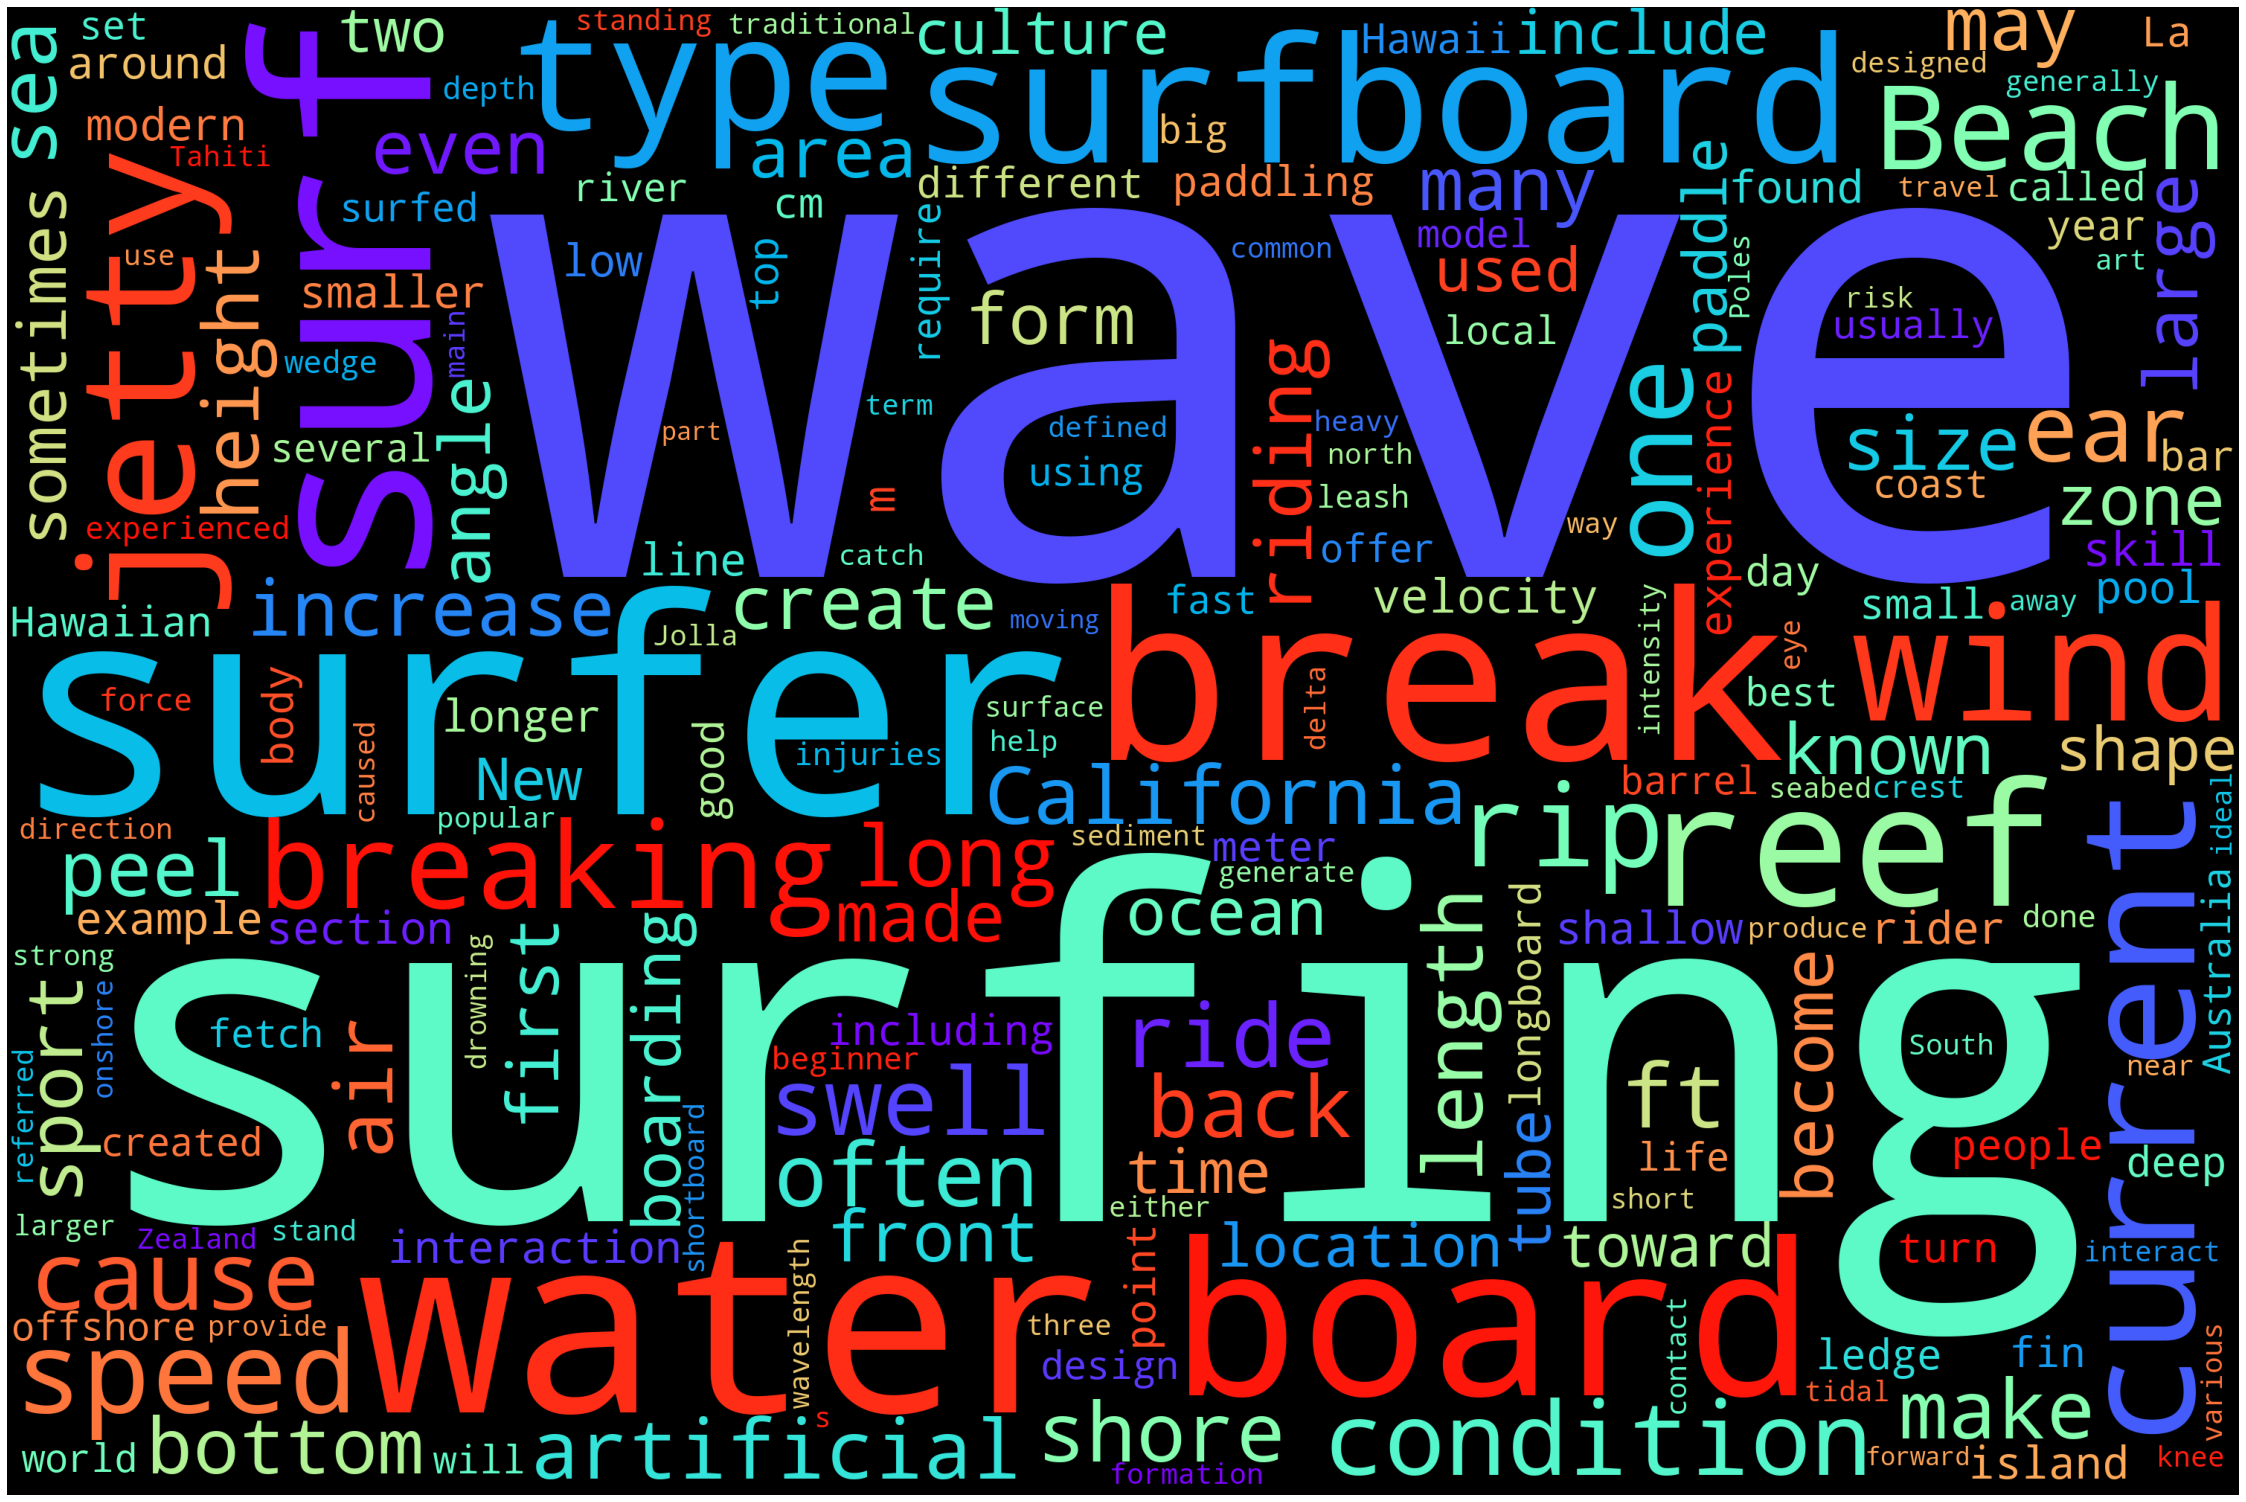

In [52]:
# Now let's create the wiki 'Surfing' wordcloud
# Import wordcloud library packages
from wordcloud import WordCloud, STOPWORDS

# Generate wordcloud using text2 with beautiful soup
cloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', 
                  colormap='rainbow', collocations=False, stopwords = STOPWORDS).generate(text2)

plot_cloud(cloud)

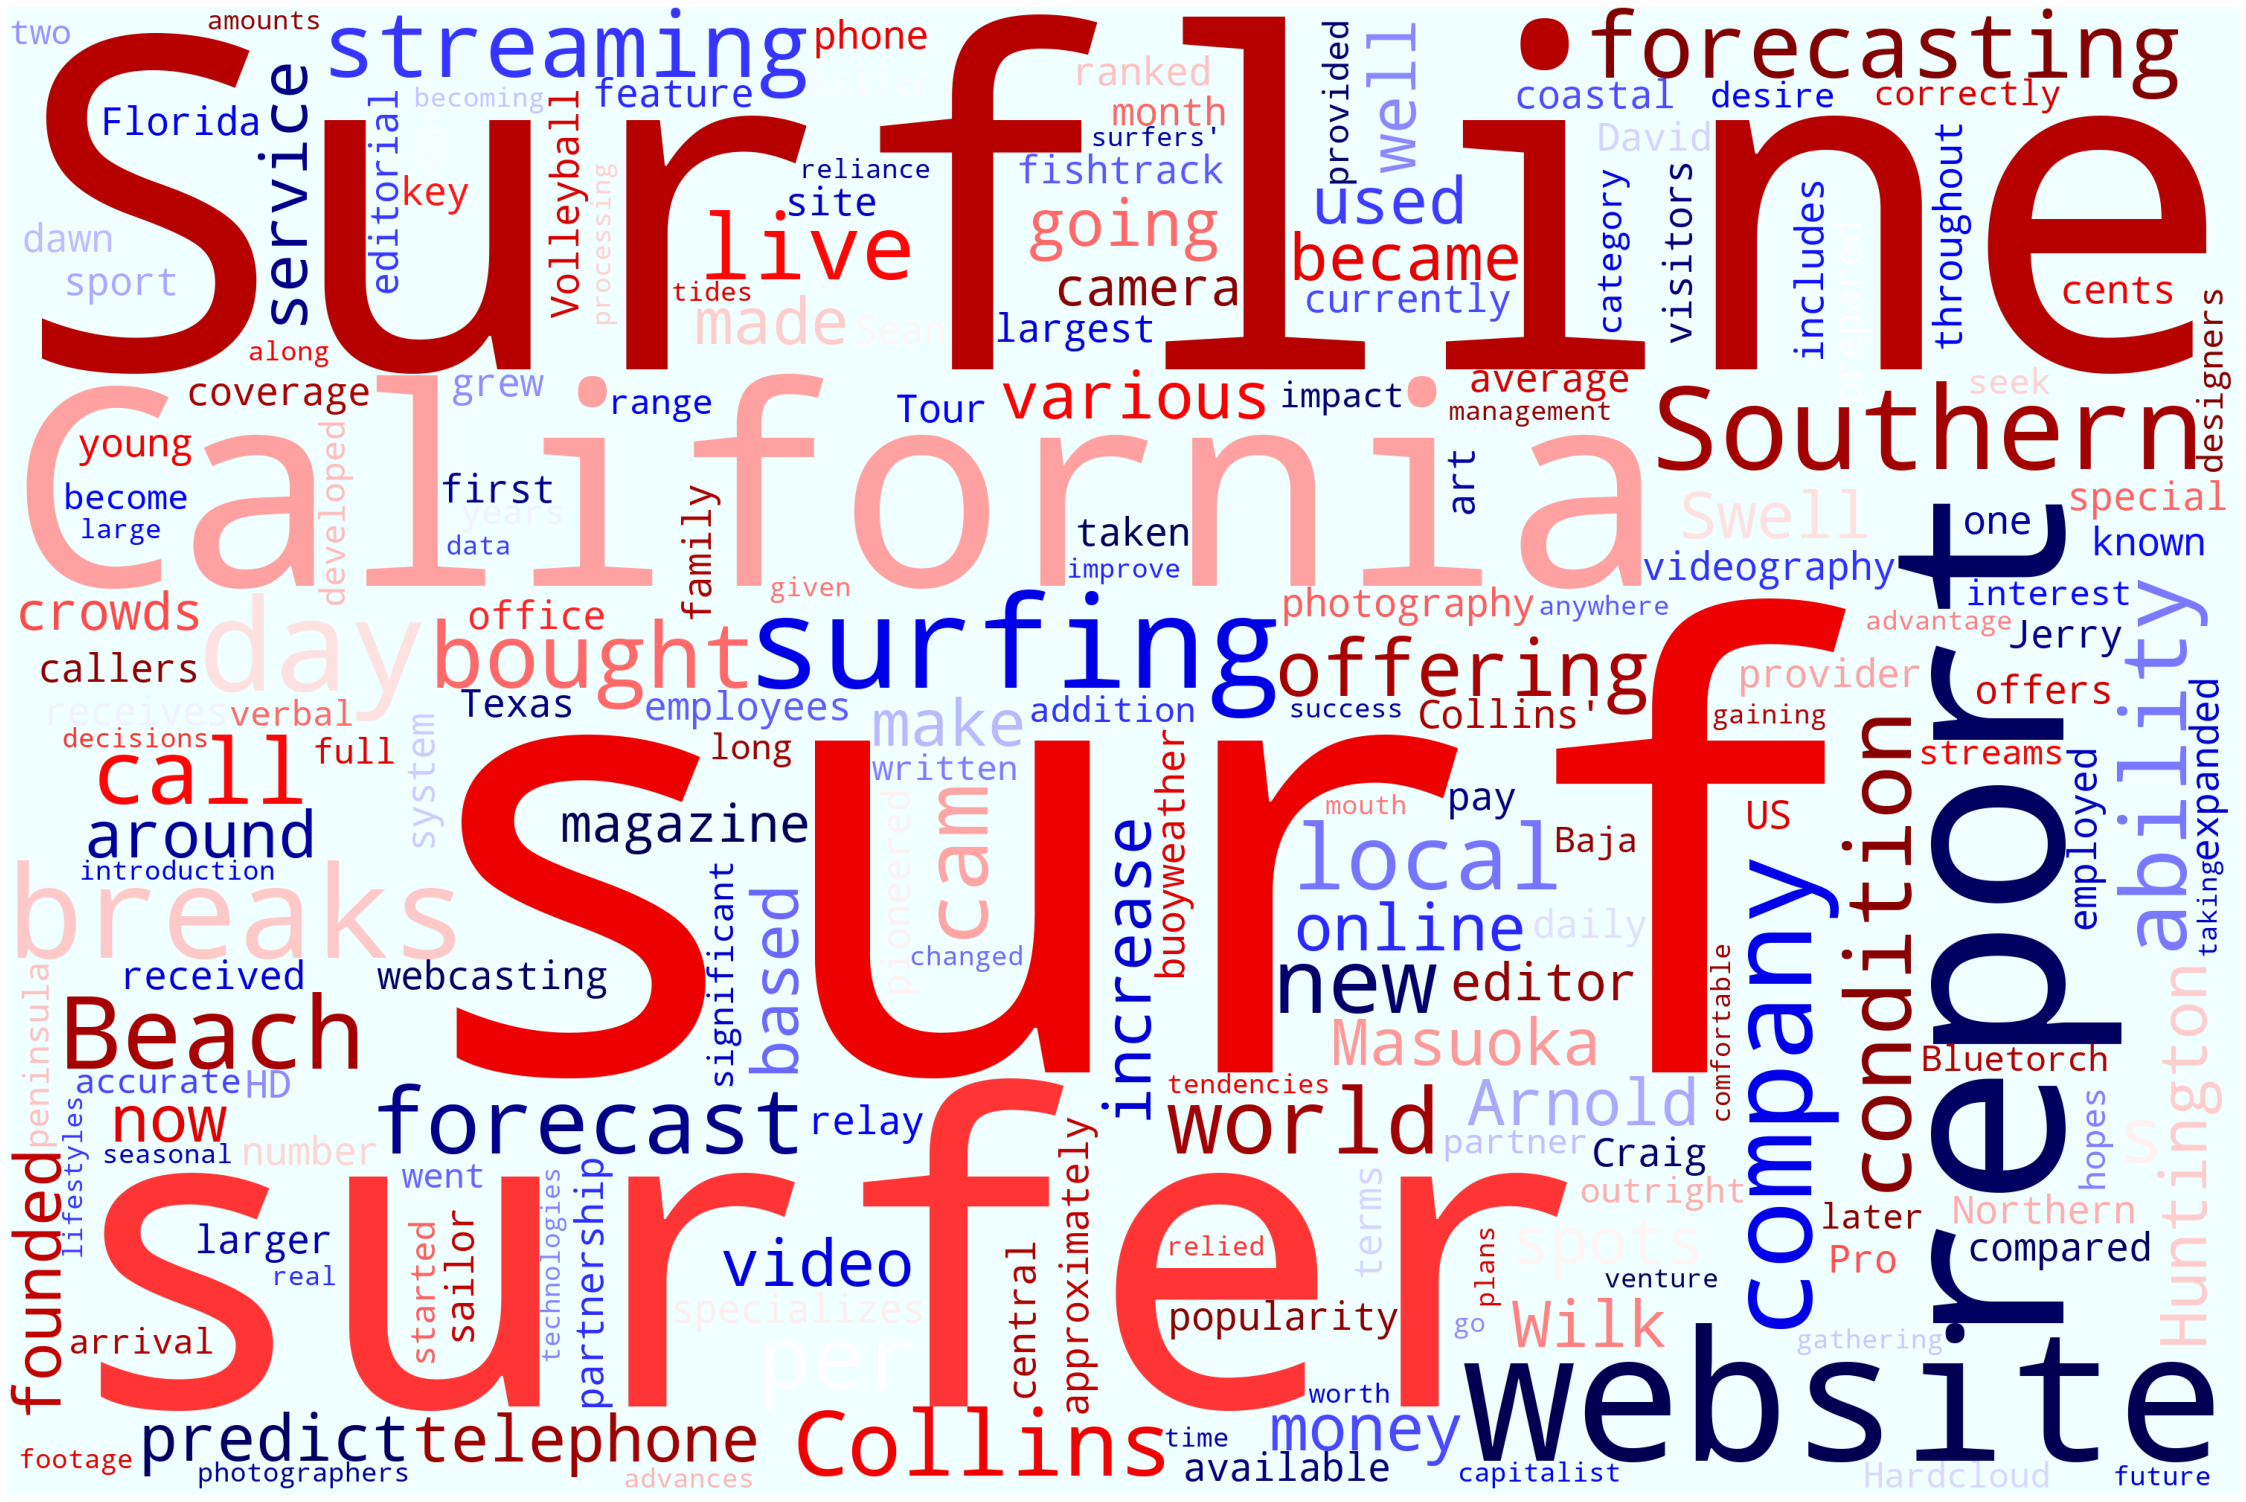

In [57]:
# Now let's create the wiki 'Surfline' wordcloud
# Import wordcloud library packages
from wordcloud import WordCloud, STOPWORDS

# Generate wordcloud using text2 with beautiful soup
cloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='azure', 
                  colormap='seismic', collocations=False, stopwords = STOPWORDS).generate(text)

plot_cloud(cloud)